In [1]:
info=spark.read.parquet("nombre_parquet/")

In [2]:
info.show(1),info.printSchema()

+---------+-------------------+--------------+-----+-------+-------+
|ProductID|               Date|           Zip|Units|Revenue|Country|
+---------+-------------------+--------------+-----+-------+-------+
|      726|1999-01-15 00:00:00|75056 CEDEX 01|    1| 115.45| France|
+---------+-------------------+--------------+-----+-------+-------+
only showing top 1 row

root
 |-- ProductID: integer (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Zip: string (nullable = true)
 |-- Units: integer (nullable = true)
 |-- Revenue: double (nullable = true)
 |-- Country: string (nullable = true)



(None, None)

In [3]:
info.count()

1341147

In [4]:
prod726=info.where(info.ProductID==726)

In [6]:
prod726.show(1)

+---------+-------------------+--------------+-----+-------+-------+
|ProductID|               Date|           Zip|Units|Revenue|Country|
+---------+-------------------+--------------+-----+-------+-------+
|      726|1999-01-15 00:00:00|75056 CEDEX 01|    1| 115.45| France|
+---------+-------------------+--------------+-----+-------+-------+
only showing top 1 row



In [10]:
info.where(info.Date=="1999-01-15 00:00:00").show(1)

+---------+-------------------+--------------+-----+-------+-------+
|ProductID|               Date|           Zip|Units|Revenue|Country|
+---------+-------------------+--------------+-----+-------+-------+
|      726|1999-01-15 00:00:00|75056 CEDEX 01|    1| 115.45| France|
+---------+-------------------+--------------+-----+-------+-------+
only showing top 1 row



In [11]:
from pyspark.sql.functions import *

info1999=info.where(year(info.Date)==1999)

In [12]:
info1999.show()

+---------+-------------------+--------------+-----+-------+-------+
|ProductID|               Date|           Zip|Units|Revenue|Country|
+---------+-------------------+--------------+-----+-------+-------+
|      726|1999-01-15 00:00:00|75056 CEDEX 01|    1| 115.45| France|
|     1909|1999-01-15 00:00:00|75056 CEDEX 01|    2|  398.9| France|
|     1961|1999-02-15 00:00:00|75056 CEDEX 01|    1|  97.07| France|
|     1517|1999-02-15 00:00:00|75056 CEDEX 01|    1| 141.65| France|
|      606|1999-02-15 00:00:00|75056 CEDEX 01|    1| 314.74| France|
|     1518|1999-02-15 00:00:00|75056 CEDEX 01|    1| 141.65| France|
|      727|1999-01-15 00:00:00|75063 CEDEX 02|    2|  125.9| France|
|      559|1999-01-15 00:00:00|75063 CEDEX 02|    1| 585.64| France|
|      728|1999-01-15 00:00:00|75063 CEDEX 02|    2|  125.9| France|
|     1535|1999-02-15 00:00:00|75063 CEDEX 02|    1| 309.65| France|
|     1536|1999-02-15 00:00:00|75063 CEDEX 02|    1| 309.65| France|
|      757|1999-01-15 00:00:00|750

In [31]:
porMeses1999=info1999.groupBy(month(info1999.Date)).sum("Units")\
    .toDF("Mes","Unidades").orderBy("Mes")


In [32]:
porMeses1999.show()

+---+--------+
|Mes|Unidades|
+---+--------+
|  1|   21097|
|  2|   31643|
|  3|   53604|
|  4|   60639|
|  5|   59820|
|  6|   54003|
|  7|   46632|
|  8|   38748|
|  9|   35632|
| 10|    8772|
| 11|    2568|
| 12|    4087|
+---+--------+



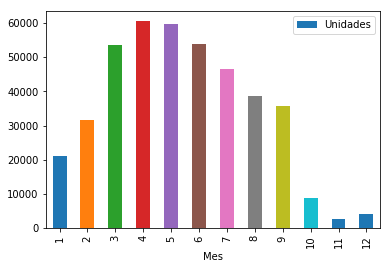

In [35]:
porMeses1999.toPandas().plot.bar(x="Mes",y="Unidades")

In [44]:
productos=spark.read.csv("bi_product.txt",sep="\t",header=True,                        
    inferSchema=True).drop("ManufacturerID")

In [45]:
productos.show(1),productos.printSchema()

+---------+-----------+--------+----------+------------+
|ProductID|    Product|Category|   Segment|Manufacturer|
+---------+-----------+--------+----------+------------+
|        1|Abbas MA-01|     Mix|All Season|       Abbas|
+---------+-----------+--------+----------+------------+
only showing top 1 row

root
 |-- ProductID: integer (nullable = true)
 |-- Product: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Manufacturer: string (nullable = true)



(None, None)

In [52]:
infoP=info.join(productos,"ProductID","left")

In [53]:
infoP.count(),info.count(),productos.count()

(1341147, 1341147, 2412)

In [60]:
infoP.show(vertical=True)

-RECORD 0---------------------------
 ProductID    | 726                 
 Date         | 1999-01-15 00:00:00 
 Zip          | 75056 CEDEX 01      
 Units        | 1                   
 Revenue      | 115.45              
 Country      | France              
 Product      | Natura RP-14        
 Category     | Rural               
 Segment      | Productivity        
 Manufacturer | Natura              
-RECORD 1---------------------------
 ProductID    | 1909                
 Date         | 1999-01-15 00:00:00 
 Zip          | 75056 CEDEX 01      
 Units        | 2                   
 Revenue      | 398.9               
 Country      | France              
 Product      | Currus MA-02        
 Category     | Mix                 
 Segment      | All Season          
 Manufacturer | Currus              
-RECORD 2---------------------------
 ProductID    | 1961                
 Date         | 1999-02-15 00:00:00 
 Zip          | 75056 CEDEX 01      
 Units        | 1                   
 

In [61]:
infoP.select("Category").distinct().show()

+--------+
|Category|
+--------+
|     Mix|
|   Urban|
|   Youth|
|   Rural|
+--------+



In [62]:
infoP.select("Segment").distinct().show()

+------------+
|     Segment|
+------------+
|  All Season|
|     Extreme|
|       Youth|
|      Select|
|Productivity|
|     Regular|
| Convenience|
|  Moderation|
+------------+



In [70]:
infoP.crosstab("Segment","Category").show()

+----------------+-----+------+------+-----+
|Segment_Category|  Mix| Rural| Urban|Youth|
+----------------+-----+------+------+-----+
|     Convenience|    0|     0|385260|    0|
|      All Season|33533|     0|     0|    0|
|    Productivity|  773|387128|     0|    0|
|           Youth|    0|     0|     0|67352|
|      Moderation|    0|     0|218468|    0|
|         Regular|    0|     0| 25836|    0|
|          Select|    0| 54677|     0|    0|
|         Extreme|    0|     0|168120|    0|
+----------------+-----+------+------+-----+



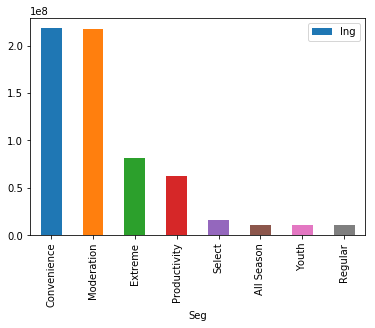

In [71]:
pandas=infoP.groupBy("Segment").sum("Revenue").toDF("Seg","Ing")\
    .orderBy("Ing",ascending=False).toPandas()

pandas.plot.bar(x="Seg",y="Ing")